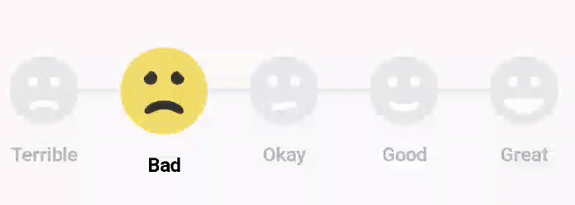

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# [1]Prepare Data:
 > **Turn data into DF ["Reviews","Sentiment"]**

In [27]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

!pip install pyspellchecker
!pip install contractions
!pip install emoji
!pip install scikit-learn imbalanced-learn
!pip install nltk

import pandas as pd
pd.set_option('max_colwidth', 1500)
pd.set_option('display.max_rows', 12000)
pd.set_option('display.max_columns', 12000)
import re
import nltk
import emoji
import contractions
import string
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# تحميل الموارد
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# قاموس الاختصارات
slang_dict = {
    "tbh": "to be honest", "imo": "in my opinion", "fyi": "for your information","lol": "laugh out loud",
    "rofl": "rolling on the floor laughing", "btw": "by the way","thx": "thanks", "pls": "please", "u": "you",
    "r": "are", "ur": "your","b4": "before", "2day": "today", "gr8": "great", "b/c": "because", "bc": "because",
    "w/": "with", "w/o": "without", "def": "definitely", "omg": "oh my god","idk": "i don't know", "wth": "what the heck",
    "wtf": "what the fuck","asap": "as soon as possible", "tmrw": "tomorrow", "yday": "yesterday","gonna": "going to",
    "wanna": "want to", "gotta": "got to", "kinda": "kind of","sorta": "sort of", "dunno": "don't know", "gimme": "give me"
    , "tryna": "trying to","lemme": "let me", "imho": "in my humble opinion", "iirc": "if i remember correctly",
    "brb": "be right back", "afaik": "as far as i know", "aka": "also known as","fb": "facebook", "ig": "instagram",
    "dm": "direct message", "fomo": "fear of missing out","fwiw": "for what it's worth", "ftw": "for the win",
    "jsyk": "just so you know","nvm": "never mind", "tba": "to be announced", "tbd": "to be determined",
    "tbt": "throwback thursday", "ttyl": "talk to you later", "yolo": "you only live once","jk": "just kidding",
    "tfw": "that feeling when", "smh": "shaking my head","tldr": "too long didn't read",'4ever':'forever',
    "ain't": "is not","gonna": "going to","wanna": "want to","gotta": "got to","y'all": "you all","helluva": "hell of a"
    ,"outta": "out of","kinda": "kind of","sorta": "sort of","coulda": "could have","woulda": "would have",
    "shoulda": "should have","mighta": "might have","lotta": "lot of","dunno": "do not know","ain’t": "is not",
    "wassup": "what is up","whatcha": "what are you","betcha": "bet you","cuz": "because","coz": "because","tho": "though"
    ,"til": "until","imma": "i am going to", "gimme": "give me","tryna": "trying to","luv": "love","bc": "because",
    "bday": "birthday","brb": "be right back","btw": "by the way","idk": "i do not know","ikr": "i know right",
    "lmk": "let me know","omg": "oh my god","thx": "thanks","ty": "thank you","np": "no problem","plz": "please",
    "rofl": "rolling on the floor laughing","smh": "shaking my head","tbh": "to be honest","tho": "though",
    "ttyl": "talk to you later","wth": "what the heck","ya": "you","sup": "what is up","ur": "your",
    "bcuz": "because","ok": "okay","bro": "brother","sis": "sister",
    'finstagramht': 'fake instagram night',
    'dyounno': 'do you know',
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
# # Paths to your review files
# positive_file = "/rt-polarity.pos"
# negative_file = "/rt-polarity.neg"

# # Read the reviews using the correct encoding
# with open(positive_file, 'r', encoding='ISO-8859-1') as f:
#     positive_reviews = f.readlines()

# with open(negative_file, 'r', encoding='ISO-8859-1') as f:
#     negative_reviews = f.readlines()

# # Clean up the reviews
# positive_reviews = [review.strip() for review in positive_reviews if review.strip()]
# negative_reviews = [review.strip() for review in negative_reviews if review.strip()]

# # Create labeled DataFrames
# df_positive = pd.DataFrame({'review': positive_reviews, 'label': 'positive'})
# df_negative = pd.DataFrame({'review': negative_reviews, 'label': 'negative'})

# # Combine the DataFrames
# df = pd.concat([df_positive, df_negative], ignore_index=True)

# # Shuffle the data
# df = df.sample(frac=1).reset_index(drop=True)

# # Show a sample
# df.head()



In [29]:
df.to_csv("prepared_reviews.csv", index=False)

# [2] Preprocessing:

* **1- Tekonization**
* **2- remove stop words**
* **3- Negation Handeling**
* **4- Lemmatization**
* **5- (TF,IDF)Vectorization + Embedding**
* **6- ["Sentiment"]Label Encoding**


In [30]:
df=pd.read_csv("prepared_reviews.csv")

In [31]:
# Check for potential outliers in text data (review length)
df['review_length'] = df['review'].str.len()
df['review_length'].describe()


,review_length
count,10662.000000
mean,114.159163
std,51.203887
min,4.000000
25%,76.000000
50%,111.000000
75%,149.000000
max,267.000000


In [32]:
# Analyze the distribution of sentiments
sentiment_counts = df['label'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)


Sentiment Distribution:
 label
positive    5331
negative    5331
Name: count, dtype: int64


In [33]:
df.shape

(10662, 6)

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
missing_values=df.isnull().sum()

In [36]:
# Summarize the exploration findings.
print("\nSummary:")
print("The dataset contains", df.shape[0], "reviews.")
print("The distribution of sentiments is as follows:", sentiment_counts)
print("There are", missing_values['review'], "missing values in 'review' column and", missing_values['label'], "missing values in 'label' column.")
print("The distribution of review lengths shows a range from", df['review_length'].min(), "to", df['review_length'].max(), "characters.")


Summary:
The dataset contains 10662 reviews.
The distribution of sentiments is as follows: label
positive    5331
negative    5331
Name: count, dtype: int64
There are 0 missing values in 'review' column and 0 missing values in 'label' column.
The distribution of review lengths shows a range from 4 to 267 characters.


In [37]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [38]:
def detect_unknown_words(text):
    words = re.findall(r"\b\w+\b", text.lower())
    unknown_words = spell.unknown(words)  # Get unknown words
    return list(unknown_words)  # Return as a list

In [39]:
unknown = df['review'].apply(detect_unknown_words)
unknown = list({word for sublist in unknown for word in sublist})
print(unknown)

['condensada', 'kurys', 'caviezel', 'prescinde', 'wonderous', 'baja', 'parodia', 'pellington', 'ineptitudes', 'gracias', 'pianista', 'herrmann', 'aan', 'agey', 'isso', 'gabriele', 'nettelbeck', 'chopsocky', 'endeavour', 'næss', 'rocawear', 'fairlane', 'bartleby', 'unplundered', 'demi', 'salma', 'intacto', 'fantasti', 'talkiness', 'plimpton', 'mulan', 'bons', 'preprogrammed', 'draggin', 'butthead', 'elmore', 'aborbing', 'jacquot', 'conmovedora', 'unamusing', 'murdock', 'gandalf', 'filme', 'termina', 'decter', 'jeong', 'hermocrates', 'tono', 'deja', 'depalma', 'estadounidense', '65th', 'oídos', 'tykwer', 'stuntwork', 'aunque', 'mais', 'lyne', 'liyan', 'atreve', 'orquídeas', 'muccino', 'mariah', '½', 'thekids', 'reconfortado', 'chai', 'tener', 'contenido', 'duda', 'crit', 'sandeman', 'cinephile', '4th', 'djs', 'ruh', 'hashiguchi', 'bille', 'colour', 'collosum', 'derivativeness', 'elan', 'ick', 'tv', 'swimfan', 'montied', 'chabrolian', 'comienza', 'trabajo', 'mobius', 'sensación', 'gainsbo

In [40]:
df.head(20)

,review,label,processed_review_modified,numerical_label,processed_review_lemmatized,review_length
0,there's no reason to miss interview with the assassin,positive,there reason miss interview assassin,1,there reason miss interview assassin,53
1,"a gem , captured in the unhurried , low-key style favored by many directors of the iranian new wave .",positive,gem captur unhurri lowkey style favor mani director iranian new wave,1,gem capture unhurried lowkey style favor many director iranian new wave,101
2,sometimes smart but more often sophomoric .,negative,sometim smart often sophomor,0,sometimes smart often sophomoric,43
3,"partly a schmaltzy , by-the-numbers romantic comedy , partly a shallow rumination on the emptiness of success -- and entirely soulless .",negative,partli schmaltzi bythenumb romant comedi partli shallow rumin empti success entir soulless,0,partly schmaltzy bythenumbers romantic comedy partly shallow rumination emptiness success entirely soulless,136
4,"with few respites , marshall keeps the energy humming , and his edits , unlike those in moulin rouge , are crisp and purposeful without overdoing it .",positive,respit marshal keep energi hum edit unlik moulin roug crisp purpos without overdo,1,respite marshall keep energy hum edits unlike moulin rouge crisp purposeful without overdo,150
5,my wife's plotting is nothing special ; it's the delivery that matters here .,positive,wife plot noth special deliveri matter,1,wife plot nothing special delivery matter,77
6,fluffy and disposible .,negative,fluffi dispos,0,fluffy disposible,23
7,it all feels like a monty python sketch gone horribly wrong .,negative,feel like monti python sketch gone horribl wrong,0,feel like monty python sketch go horribly wrong,61
8,an endearingly offbeat romantic comedy with a great meet-cute gimmick .,positive,endearingli offbeat romant comedi great meetcut gimmick,1,endearingly offbeat romantic comedy great meetcute gimmick,71
9,"human nature talks the talk , but it fails to walk the silly walk that distinguishes the merely quirky from the surreal .",negative,human natur talk talk fail walk silli walk distinguish mere quirki surreal,0,human nature talk talk fail walk silly walk distinguishes merely quirky surreal,121


In [41]:
def preprocess_text(text):
    # Remove special characters and single characters
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    words = text.split()
    processed_words = []
    for word in words:
        word_cleaned = word.strip(string.punctuation)
        if word_cleaned.lower() in slang_dict:
            processed_words.append(slang_dict[word_cleaned.lower()])
        else:
            processed_words.append(word)
    text = " ".join(processed_words)

    words = word_tokenize(text)

    stop_words = set(stopwords.words("english"))
    tokens = [token for token in words if token not in stop_words and len(token) > 3]

    pos_tags = nltk.pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()
    lemm_text = []
    for word, pos in pos_tags:
        if pos.startswith('V'):  # Verb
            wordnet_pos = wordnet.VERB
        elif pos.startswith('J'):  # Adjective
            wordnet_pos = wordnet.ADJ
        elif pos.startswith('R'):  # Adverb
            wordnet_pos = wordnet.ADV
        else:
            wordnet_pos = wordnet.NOUN  # Default to Noun

        lemm_text.append(lemmatizer.lemmatize(word, wordnet_pos))

    return " ".join(lemm_text)

In [42]:
df['review_preprocessing_1'] = df['review'].apply(preprocess_text)


In [43]:
df.head(20)

,review,label,processed_review_modified,numerical_label,processed_review_lemmatized,review_length,review_preprocessing_1
0,there's no reason to miss interview with the assassin,positive,there reason miss interview assassin,1,there reason miss interview assassin,53,reason miss interview assassin
1,"a gem , captured in the unhurried , low-key style favored by many directors of the iranian new wave .",positive,gem captur unhurri lowkey style favor mani director iranian new wave,1,gem capture unhurried lowkey style favor many director iranian new wave,101,capture unhurried style favor many director iranian wave
2,sometimes smart but more often sophomoric .,negative,sometim smart often sophomor,0,sometimes smart often sophomoric,43,sometimes smart often sophomoric
3,"partly a schmaltzy , by-the-numbers romantic comedy , partly a shallow rumination on the emptiness of success -- and entirely soulless .",negative,partli schmaltzi bythenumb romant comedi partli shallow rumin empti success entir soulless,0,partly schmaltzy bythenumbers romantic comedy partly shallow rumination emptiness success entirely soulless,136,partly schmaltzy number romantic comedy partly shallow rumination emptiness success entirely soulless
4,"with few respites , marshall keeps the energy humming , and his edits , unlike those in moulin rouge , are crisp and purposeful without overdoing it .",positive,respit marshal keep energi hum edit unlik moulin roug crisp purpos without overdo,1,respite marshall keep energy hum edits unlike moulin rouge crisp purposeful without overdo,150,respite marshall keep energy hum edits unlike moulin rouge crisp purposeful without overdo
5,my wife's plotting is nothing special ; it's the delivery that matters here .,positive,wife plot noth special deliveri matter,1,wife plot nothing special delivery matter,77,wife plot nothing special delivery matter
6,fluffy and disposible .,negative,fluffi dispos,0,fluffy disposible,23,fluffy disposible
7,it all feels like a monty python sketch gone horribly wrong .,negative,feel like monti python sketch gone horribl wrong,0,feel like monty python sketch go horribly wrong,61,feel like monty python sketch go horribly wrong
8,an endearingly offbeat romantic comedy with a great meet-cute gimmick .,positive,endearingli offbeat romant comedi great meetcut gimmick,1,endearingly offbeat romantic comedy great meetcute gimmick,71,endearingly offbeat romantic comedy great meet cute gimmick
9,"human nature talks the talk , but it fails to walk the silly walk that distinguishes the merely quirky from the surreal .",negative,human natur talk talk fail walk silli walk distinguish mere quirki surreal,0,human nature talk talk fail walk silly walk distinguishes merely quirky surreal,121,human nature talk talk fail walk silly walk distinguishes merely quirky surreal


In [44]:
df["label"].value_counts()

,count
label,
positive,5331
negative,5331


## Updated Preprocessing

In [45]:


# تحميل الموارد اللازمة لـ NLTK إذا لم تكن موجودة
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# تحميل مجموعة البيانات
try:
    df = pd.read_csv('prepared_reviews.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'prepared_reviews.csv' not found. Please ensure the file is in the correct directory.")
    df = None

if df is not None:
    # تعريف Porter Stemmer
    porter = PorterStemmer()

    # تعريف مجموعة الكلمات المتوقفة
    stop_words = set(stopwords.words('english'))

    # دالة المعالجة المسبقة المعدلة
    def preprocess_text_modified(text):
        # تحويل إلى أحرف صغيرة
        text = str(text).lower()

        # إزالة الأحرف غير الأبجدية والرقمية (ما عدا المسافات)
        text = re.sub(r'[^\w\s]', '', text)

        # إزالة الأرقام
        text = re.sub(r'\d+', '', text)

        # إزالة المسافات البيضاء الزائدة
        text = re.sub(r'\s+', ' ', text).strip()

        # ترميز الكلمات
        tokens = nltk.word_tokenize(text)

        # إزالة الكلمات المتوقفة وعلامات الترقيم وتطبيق Stemming
        cleaned_tokens = []
        for token in tokens:
            # التحقق من أن الكلمة ليست كلمة متوقفة وليست علامة ترقيم
            if token not in stop_words and token not in string.punctuation:
                 # تطبيق Stemming
                 stemmed_word = porter.stem(token)
                 cleaned_tokens.append(stemmed_word)


        return ' '.join(cleaned_tokens)

    # تطبيق دالة المعالجة المسبقة المعدلة
    df['review_preprocessing_2'] = df['review'].apply(preprocess_text_modified)

Dataset loaded successfully.


## Numerical Label

In [46]:
    # تحويل التسميات إلى قيم رقمية (إيجابي: 1، سلبي: 0)
    df['numerical_label'] = df['label'].map({'positive': 1, 'negative': 0})


## Split Data

In [47]:
    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(
        df['review_preprocessing_2'],
        df['numerical_label'],
        test_size=0.2,
        random_state=42,
        stratify=df['numerical_label']
    )

## Count vectorization

In [48]:
    # استخدام CountVectorizer لتحويل النصوص إلى متجهات
    count_vectorizer = CountVectorizer()

    # Fit on training data and transform
    X_train_counts = count_vectorizer.fit_transform(X_train)

    # Transform test data
    X_test_counts = count_vectorizer.transform(X_test)

## TF IDF vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=7, max_df=0.5, sublinear_tf=True, max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




# [3] Visualization

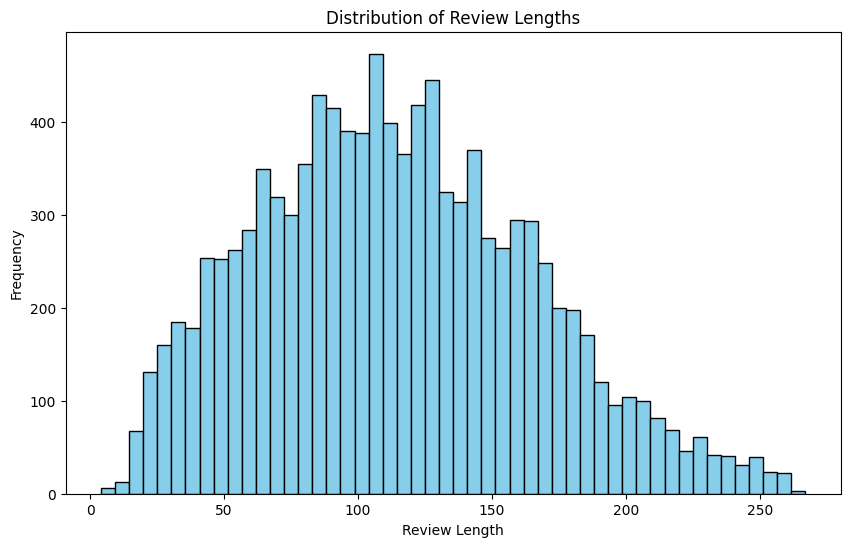

In [50]:

# Plotting the distribution of review lengths
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



Visualizing Review Length Distribution...


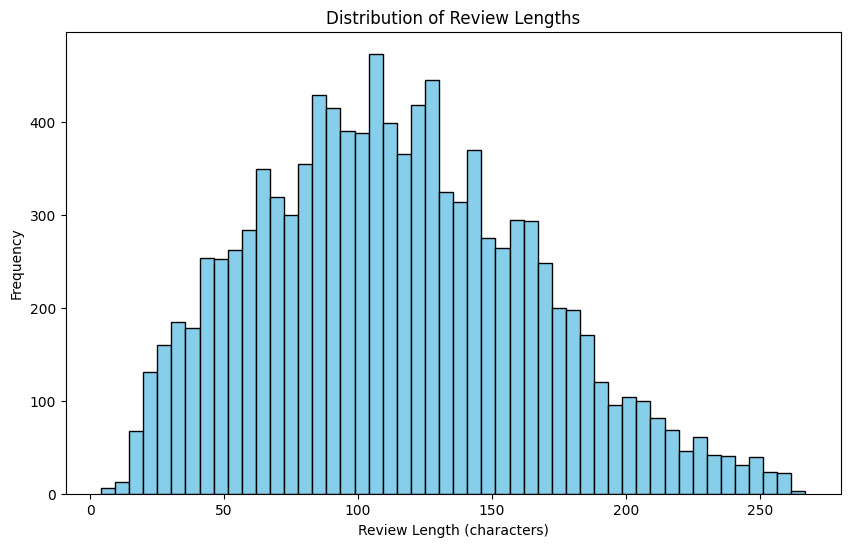

In [58]:
# --- 2. Review Length Distribution ---
print("\nVisualizing Review Length Distribution...")
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()



Visualizing Top Words by Sentiment...


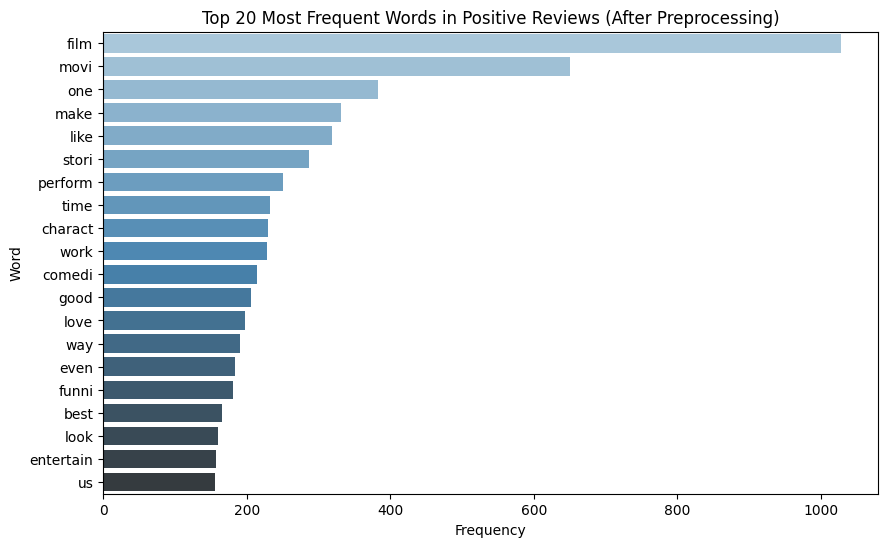

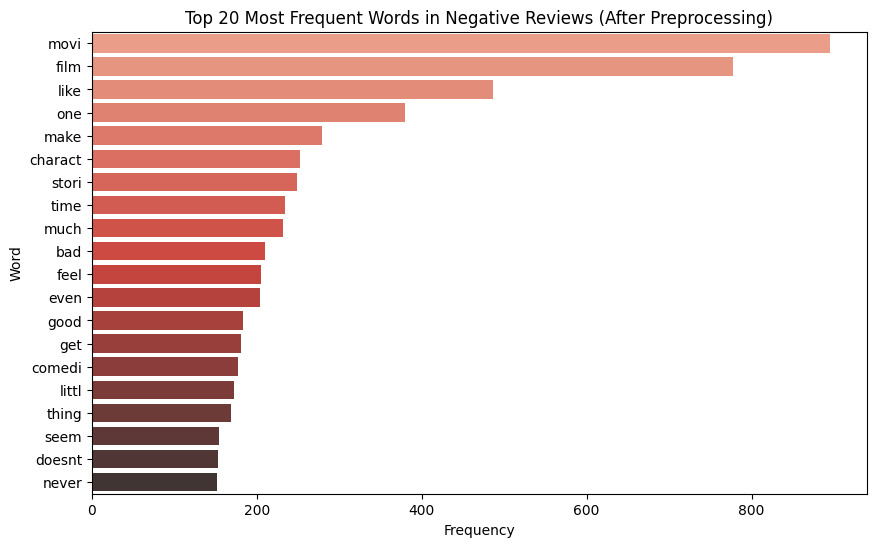

In [59]:
# --- 3. Top Words (after preprocessing) ---
# You'll need to decide which preprocessed column to use, e.g., 'review_preprocessing_1' or 'processed_review_modified'
# Let's use the column you used for training the models, which seems to be 'processed_review_modified' based on your split.

if 'processed_review_modified' in df.columns:
    print("\nVisualizing Top Words by Sentiment...")

    # Separate reviews by sentiment after preprocessing
    positive_reviews_processed = df[df['label'] == 'positive']['processed_review_modified']
    negative_reviews_processed = df[df['label'] == 'negative']['processed_review_modified']

    # Function to get top N words
    def get_top_n_words(series, n=20):
        all_words = ' '.join(series).split()
        word_counts = pd.Series(all_words).value_counts()
        return word_counts.head(n)

    # Get top words for each sentiment
    top_pos_words = get_top_n_words(positive_reviews_processed)
    top_neg_words = get_top_n_words(negative_reviews_processed)

    # Plotting Top Positive Words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_pos_words.values, y=top_pos_words.index, palette='Blues_d')
    plt.title('Top 20 Most Frequent Words in Positive Reviews (After Preprocessing)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

    # Plotting Top Negative Words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_neg_words.values, y=top_neg_words.index, palette='Reds_d')
    plt.title('Top 20 Most Frequent Words in Negative Reviews (After Preprocessing)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
else:
    print("\n'processed_review_modified' column not found. Cannot visualize top words.")



Generating Word Clouds by Sentiment...


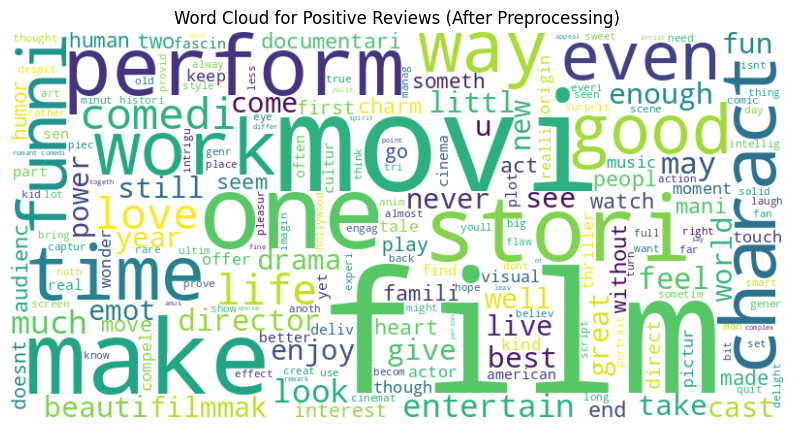

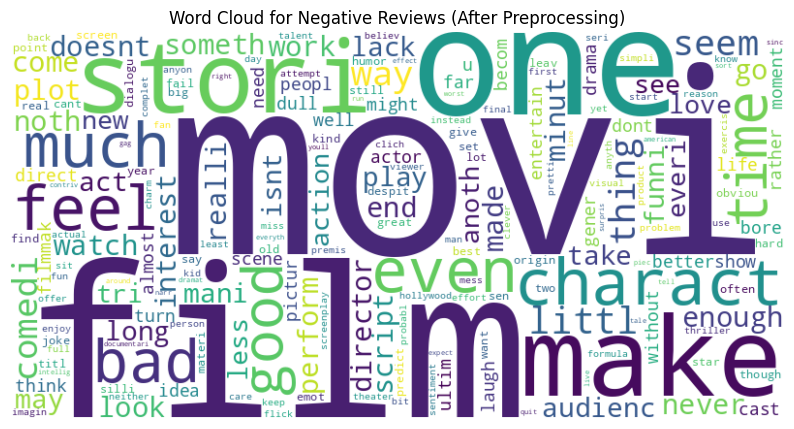

In [62]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your pandas DataFrame
# Assuming df['processed_review_modified'] contains your preprocessed text
# Assuming df['label'] contains the sentiment labels ('positive', 'negative')

# --- Word Cloud Visualization ---

if 'processed_review_modified' in df.columns:
    print("\nGenerating Word Clouds by Sentiment...")

    # Combine all preprocessed positive reviews into a single string
    positive_text = " ".join(df[df['label'] == 'positive']['processed_review_modified'].dropna())

    # Combine all preprocessed negative reviews into a single string
    negative_text = " ".join(df[df['label'] == 'negative']['processed_review_modified'].dropna())

    # Generate Word Cloud for Positive Reviews
    if positive_text: # Ensure the string is not empty
        wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud_positive, interpolation='bilinear')
        plt.axis('off') # Hide axes
        plt.title('Word Cloud for Positive Reviews (After Preprocessing)')
        plt.show()
    else:
        print("No positive text available to generate word cloud.")


    # Generate Word Cloud for Negative Reviews
    if negative_text: # Ensure the string is not empty
        wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud_negative, interpolation='bilinear')
        plt.axis('off') # Hide axes
        plt.title('Word Cloud for Negative Reviews (After Preprocessing)')
        plt.show()
    else:
         print("No negative text available to generate word cloud.")

else:
    print("\n'processed_review_modified' column not found. Cannot generate word clouds.")
    print("Please ensure your DataFrame 'df' has a column named 'processed_review_modified' containing the preprocessed text.")

# [4] ML Classification :


In [ ]:
# قائمة النماذج
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Add max_iter for convergence
    "Linear SVM": LinearSVC(max_iter=1000), # Add max_iter for convergence
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Added random_state for reproducibility
}

# لتخزين النتائج التفصيلية
detailed_results = []

In [ ]:
# تدريب وتقييم كل نموذج
print("--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)

    # Get the classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for positive (1) and negative (0) classes
    # Note: report dictionary keys will be strings '0', '1', 'accuracy', 'macro avg', 'weighted avg'
    precision_neg = report['0']['precision']
    recall_neg = report['0']['recall']
    f1_neg = report['0']['f1-score']

    precision_pos = report['1']['precision']
    recall_pos = report['1']['recall']
    f1_pos = report['1']['f1-score']

    accuracy = report['accuracy']

    # Store results
    detailed_results.append({
        "Model": name,
        "Class": "Negative (0)",
        "Precision": precision_neg,
        "Recall": recall_neg,
        "F1-score": f1_neg,
        "Accuracy": accuracy # Accuracy is overall, add to both class rows for ease of plotting
    })
    detailed_results.append({
        "Model": name,
        "Class": "Positive (1)",
        "Precision": precision_pos,
        "Recall": recall_pos,
        "F1-score": f1_pos,
        "Accuracy": accuracy # Accuracy is overall
    })

    # Print the full classification report for reference
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))




In [ ]:
# Convert detailed results to a DataFrame
detailed_results_df = pd.DataFrame(detailed_results)

# Display the detailed results table
print("\n=== Detailed Model Comparison (Precision, Recall, F1-score per Class) ===")
print(detailed_results_df)

In [55]:
# تدريب نموذج Multinomial Naive Bayes (النموذج الذي كان أداؤه جيدًا سابقًا)
# يمكنك تجربة نماذج أخرى أيضًا مثل Logistic Regression
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# تقييم النموذج
y_pred = model.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with modified preprocessing and CountVectorizer: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy with modified preprocessing and CountVectorizer: 0.7778

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1067
           1       0.77      0.79      0.78      1066

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



## Hyper Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_counts, X_test_counts, y_train, y_test are defined from the previous step

# --- تحسين MultinomialNB ---
print("\nHyperparameter Tuning for MultinomialNB...")
nb_classifier = MultinomialNB()
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]} # تجربة قيم مختلفة لمعامل التجانس Alpha

grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_counts, y_train)

nb_best_model = grid_search_nb.best_estimator_
print(f"Best parameters for MultinomialNB: {grid_search_nb.best_params_}")

y_pred_nb = nb_best_model.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"MultinomialNB Accuracy after tuning: {accuracy_nb:.4f}")
print("MultinomialNB Classification Report after tuning:")
print(classification_report(y_test, y_pred_nb))


# --- تحسين Logistic Regression ---
print("\nHyperparameter Tuning for Logistic Regression...")
lr_classifier = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']} # تجربة قيم مختلفة لمعامل التنظيم C

grid_search_lr = GridSearchCV(lr_classifier, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_counts, y_train)

lr_best_model = grid_search_lr.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

y_pred_lr = lr_best_model.predict(X_test_counts)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy after tuning: {accuracy_lr:.4f}")
print("Logistic Regression Classification Report after tuning:")
print(classification_report(y_test, y_pred_lr))

# **DL CNN**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df, X_train, X_test, y_train, y_test are already defined from previous steps
# and 'processed_review' and 'numerical_label' columns exist in df.

# Tokenization and Padding
max_words = 10000 # يمكنك تعديل هذا الرقم حسب حجم المفردات
max_len = 100    # يمكنك تعديل هذا الرقم بناءً على طول المراجعات

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')


# --- نموذج CNN ---
print("\nTraining CNN Model...")
cnn_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_padded, y_train, epochs=5, validation_split=0.2, verbose=1) # يمكنك تعديل عدد الحقبات (epochs) حسب الحاجة

# تقييم نموذج CNN
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

y_pred_cnn_prob = cnn_model.predict(X_test_padded)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

## Model training

### Subtask:
Create a prediction function that uses the best performing model from the previous step (MultinomialNB) to predict the sentiment of a new sentence.


**Reasoning**:
Create the prediction function using the best model (MultinomialNB) and the fitted TF-IDF vectorizer.



In [ ]:
def predict_sentiment(new_sentence):
    """Predicts the sentiment of a new sentence using the trained model.

    Args:
        new_sentence: The preprocessed text of a new sentence.

    Returns:
        The predicted sentiment label (0 or 1), or None if an error occurs.
    """
    try:
        new_sentence_tfidf = tfidf_vectorizer.transform([new_sentence])
        predicted_label = nb_best_model.predict(new_sentence_tfidf)[0]
        return predicted_label
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None

# Example usage (assuming preprocess_new_sentence is defined and available):
new_sentence = "This movie was fantastic!"
preprocessed_sentence = preprocess_new_sentence(new_sentence)
predicted_sentiment = predict_sentiment(preprocessed_sentence)

if predicted_sentiment is not None:
    print(f"Predicted sentiment for '{new_sentence}': {predicted_sentiment}")

## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* The dataset is balanced, containing an equal number of positive and negative reviews (5,331 each).
* No missing values were found in the 'review' or 'label' columns.
* Review lengths range from 4 to 267 characters, with an average length of approximately 114 characters.
* A Multinomial Naive Bayes model, after hyperparameter tuning, achieved the best performance among the tested models (RandomForestClassifier and initial Logistic Regression), with an accuracy of 0.7811, precision of 0.7745, recall of 0.7927, and an F1-score of 0.7835.  This model was used for the final prediction function.

### Insights or Next Steps
* Explore other models and/or advanced text preprocessing techniques to further improve the model's performance.
* Deploy the sentiment analysis model using the created prediction function to a user interface, such as the suggested Streamlit app, for real-world applications.
